# Data Modeling

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading training and test datasets

In [6]:
train_df = pd.read_csv("../data/hotel_bookings.csv")
test_df = pd.read_csv("../data/test.csv")

print("Train shape:", train_df)
print("Test shape:", test_df)
train_df.head()

Train shape:                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### Visualising target distribution

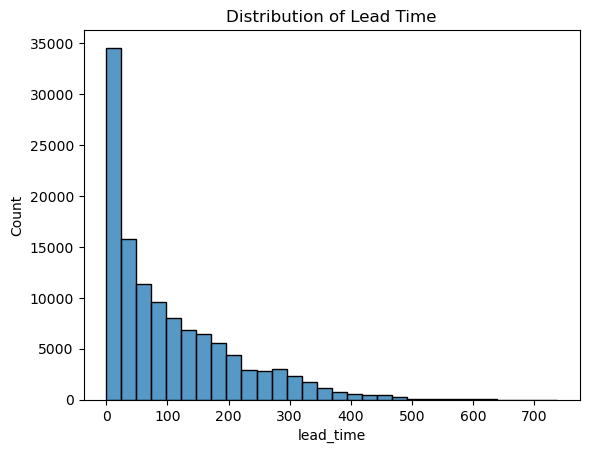

In [7]:
sns.histplot(train_df['lead_time'], bins=30)
plt.title("Distribution of Lead Time")
plt.show()

#### View Cancellation rate

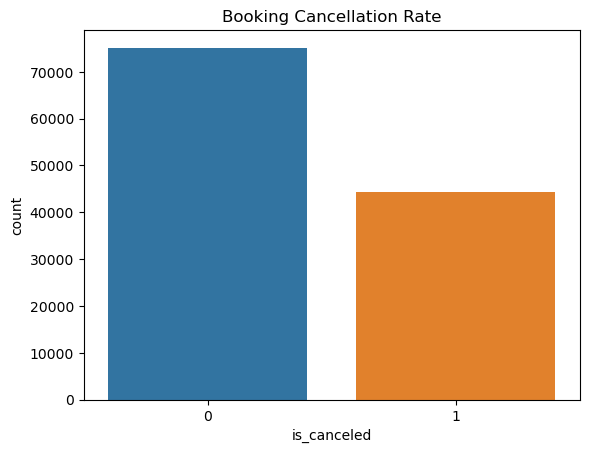

In [9]:
sns.countplot(x='is_canceled', data=train_df)
plt.title('Booking Cancellation Rate')
plt.show()

#### Correlation heatmap

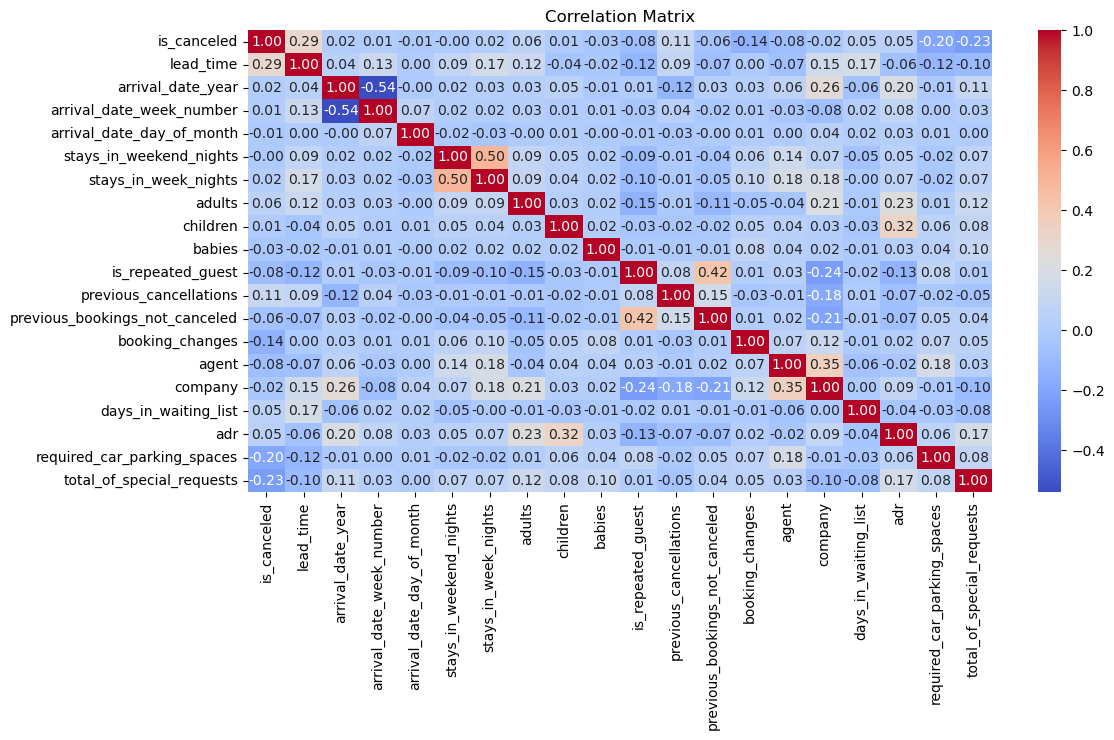

In [15]:
numerical_cols = train_df.select_dtypes(include='number') # numerical columns only
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### Feature Importance

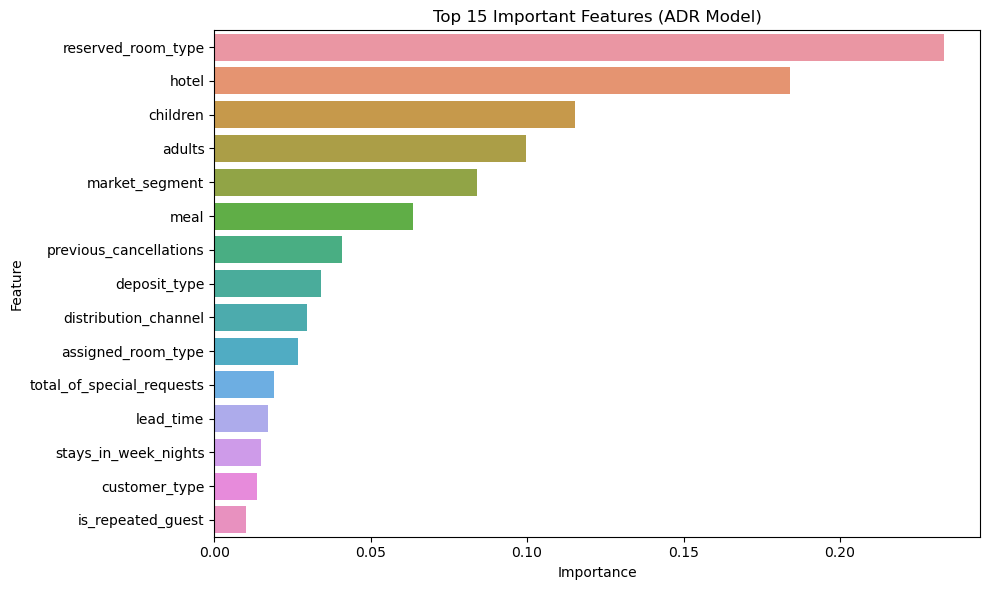

In [21]:
# from artifacts
feature_importance = pd.read_csv("../artifacts/feature_importance.csv")
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance.head(15)) # Top 15 features
plt.title("Top 15 Important Features (ADR Model)")
plt.tight_layout()
plt.show()

#### Loading and evaluating predictions

In [34]:
# import labraries
from sklearn.metrics import mean_absolute_error, r2_score

Cancellation R² Score: 0.60
Cancellation MAE: 0.19


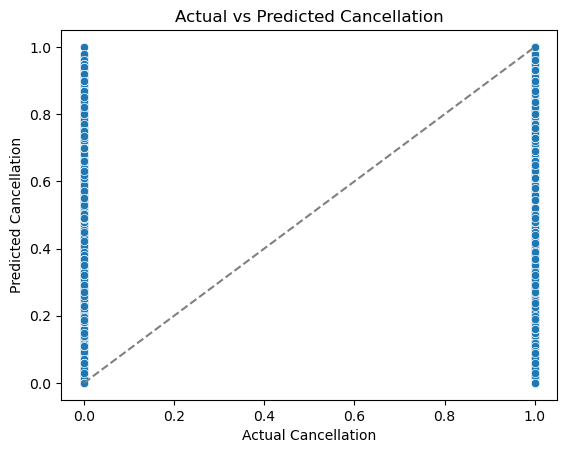

In [47]:
# Cancellation Prediction
cancel_pred_df = pd.read_csv("../artifacts/cancellation_predictions.csv")

r2 = r2_score(cancel_pred_df['actual_cancellation'], cancel_pred_df['predicted_cancellation'])
mae = mean_absolute_error(cancel_pred_df['actual_cancellation'], cancel_pred_df['predicted_cancellation'])

print(f"Cancellation R² Score: {r2:.2f}")
print(f"Cancellation MAE: {mae:.2f}")

sns.scatterplot(x='actual_cancellation', y='predicted_cancellation', data=cancel_pred_df)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Actual Cancellation")
plt.ylabel("Predicted Cancellation")
plt.title("Actual vs Predicted Cancellation")
plt.show()

ADR R² Score: 0.52
ADR MAE: 22.19


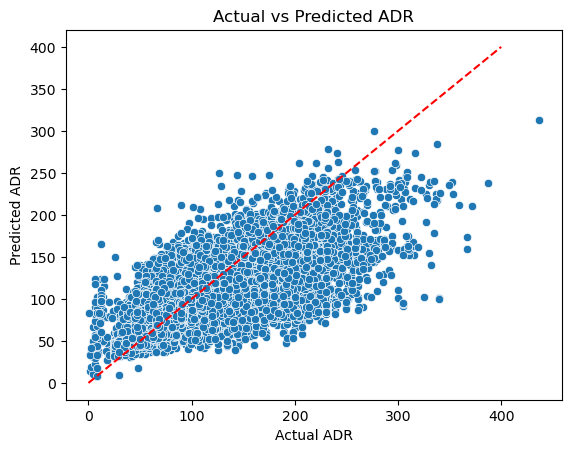

In [48]:
# ADR Prediction
adr_pred_df = pd.read_csv("../artifacts/adr_predictions.csv")

r2 = r2_score(adr_pred_df['actual_adr'], adr_pred_df['predicted_adr'])
mae = mean_absolute_error(adr_pred_df['actual_adr'], adr_pred_df['predicted_adr'])

print(f"ADR R² Score: {r2:.2f}")
print(f"ADR MAE: {mae:.2f}")

sns.scatterplot(x='actual_adr', y='predicted_adr', data=adr_pred_df)
plt.plot([0, 400], [0, 400], '--', color='red')
plt.xlabel("Actual ADR")
plt.ylabel("Predicted ADR")
plt.title("Actual vs Predicted ADR")
plt.show()